# Initialize

### Library Import

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.style as style
import seaborn as sns
import lxml

import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.stats.multicomp import MultiComparison

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

style.use('fivethirtyeight')

### Data Import

In [3]:
df = pd.read_csv("./data/ny_accidents.csv")

In [4]:
df.shape
df.columns
df.head(10)
df.tail(10)

(39537, 48)

Index(['Unnamed: 0', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance.mi.', 'Description',
       'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature.F.', 'Wind_Chill.F.', 'Humidity...', 'Pressure.in.',
       'Visibility.mi.', 'Wind_Direction', 'Wind_Speed.mph.',
       'Precipitation.in.', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,237351,A-2953957,2,2020-12-03 20:52:00,2020-12-03 22:17:27,43.119443,-75.293198,43.120291,-75.293547,0.061,...,False,False,False,False,False,False,Night,Night,Night,Night
1,237362,A-2953968,2,2020-09-25 23:19:55,2020-09-25 23:41:46,40.834883,-73.866244,40.833773,-73.863254,0.174,...,False,False,False,False,False,False,Night,Night,Night,Night
2,237365,A-2953971,2,2020-10-15 12:17:30,2020-10-16 03:44:00,40.802117,-73.916498,40.804907,-73.911238,0.336,...,False,False,True,False,False,False,Day,Day,Day,Day
3,237402,A-2954008,2,2020-10-03 02:58:56,2020-10-03 04:40:33,43.073669,-78.990615,43.075229,-78.990615,0.108,...,False,False,False,False,False,False,Night,Night,Night,Night
4,237423,A-2954030,2,2020-09-17 13:19:55,2020-09-17 15:24:11,41.308840,-74.025331,41.307460,-74.027961,0.167,...,False,False,False,False,False,False,Day,Day,Day,Day
5,237470,A-2954079,2,2020-12-17 04:51:00,2020-12-17 06:54:34,41.519447,-74.023808,41.519377,-74.018308,0.285,...,False,False,False,False,False,False,Night,Night,Night,Night
6,237508,A-2954117,2,2020-10-30 20:33:31,2020-10-31 01:56:42,40.934782,-73.865086,40.931725,-73.876216,0.618,...,False,False,False,False,False,False,Night,Night,Night,Night
7,237517,A-2954126,2,2020-10-21 01:40:00,2020-10-21 02:41:00,42.888621,-78.887984,42.896820,-78.896185,0.702,...,False,False,False,False,False,False,Night,Night,Night,Night
8,237535,A-2954144,2,2020-11-25 12:12:30,2020-11-26 05:11:00,40.847107,-73.933376,40.850139,-73.944701,0.628,...,False,False,False,False,False,False,Day,Day,Day,Day
9,237536,A-2954145,2,2020-09-30 12:50:00,2020-09-30 20:43:00,40.847867,-73.934797,40.850332,-73.945411,0.580,...,False,False,False,False,True,False,Day,Day,Day,Day


,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
39527,1515670,A-4239012,2,2019-08-23 10:04:09,2019-08-23 10:31:58,40.850020,-73.943992,40.853290,-73.960640,0.899,...,False,False,False,False,False,False,Day,Day,Day,Day
39528,1515675,A-4239017,2,2019-08-23 14:00:27,2019-08-23 14:27:52,41.307070,-74.127840,41.307210,-74.128180,0.020,...,False,False,False,False,False,False,Day,Day,Day,Day
39529,1515676,A-4239018,2,2019-08-23 14:00:27,2019-08-23 14:30:11,40.601750,-74.060440,40.602350,-74.057550,0.157,...,False,False,False,False,False,False,Day,Day,Day,Day
39530,1515678,A-4239020,2,2019-08-23 15:40:15,2019-08-23 16:08:04,40.767170,-73.695980,40.769220,-73.690500,0.320,...,False,False,False,False,False,False,Day,Day,Day,Day
39531,1515679,A-4239021,2,2019-08-23 17:03:32,2019-08-23 17:31:23,40.736340,-73.856210,40.737040,-73.852840,0.183,...,False,False,False,False,False,False,Day,Day,Day,Day
39532,1515680,A-4239022,2,2019-08-23 16:48:32,2019-08-23 17:16:06,40.731626,-73.872164,40.731626,-73.872164,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
39533,1515684,A-4239026,2,2019-08-23 16:16:21,2019-08-23 16:44:16,40.969130,-73.816990,40.969130,-73.816990,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
39534,1515685,A-4239027,2,2019-08-23 16:40:16,2019-08-23 17:06:13,40.689860,-73.567770,40.689910,-73.569200,0.075,...,False,False,False,False,False,False,Day,Day,Day,Day
39535,1515692,A-4239034,2,2019-08-23 19:20:28,2019-08-23 19:49:25,40.601750,-74.060440,40.610690,-74.031740,1.627,...,False,False,False,False,False,False,Day,Day,Day,Day
39536,1515693,A-4239035,2,2019-08-23 17:51:33,2019-08-23 18:19:49,40.717320,-73.831200,40.715890,-73.818010,0.698,...,False,False,False,False,False,False,Day,Day,Day,Day


# Dataset Description

### Missing Values (and their removal)

In [5]:
df1 = df.drop(['Number', 'City', 'Airport_Code'], axis=1)

In [6]:
s = df1.isnull().any()  # check for mising values in any of the columns (returns a Pandas Series containing booleans)
# print whether there are any missing values
if (len(s[s == True]) > 0):
    cols_na = s[s == True].keys().values
    # remove any missing values
    df_nyti = df1.dropna()
    # print the names of the columns containing null values
    print(f"There are {len(df1) - len(df_nyti)} rows with missing values. The columns ({len(cols_na)}) in the dataset that contain missing values are: {cols_na}.")
    print("Rows with missing values in the dataset have been removed and new dataframe df_nyti has been created")
else:
    print("There are no missing values in the dataset")

There are 2758 rows with missing values. The columns (14) in the dataset that contain missing values are: ['Weather_Timestamp' 'Temperature.F.' 'Wind_Chill.F.' 'Humidity...'
 'Pressure.in.' 'Visibility.mi.' 'Wind_Direction' 'Wind_Speed.mph.'
 'Precipitation.in.' 'Weather_Condition' 'Sunrise_Sunset' 'Civil_Twilight'
 'Nautical_Twilight' 'Astronomical_Twilight'].
Rows with missing values in the dataset have been removed and new dataframe df_nyti has been created


### Identifying Continuous (i.e. numerical) & Categorical Variables
Also organinising into different subject areas like date/times, weather related, road features, location etc...

In [7]:
numerical = [
    'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance.mi.',  
    'Temperature.F.', 'Wind_Chill.F.', 'Humidity...', 'Pressure.in.', 'Visibility.mi.', 'Wind_Speed.mph.', 'Precipitation.in.'
]

categorical = [
    'Severity', 'Wind_Direction', 
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 
    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

datetimes = ['Start_Time', 'End_Time', 'Weather_Timestamp', 'Timezone']

weather_numeric = [
    'Temperature.F.', 'Wind_Chill.F.', 'Humidity...', 'Pressure.in.', 'Visibility.mi.', 
    'Wind_Speed.mph.', 'Precipitation.in.'
]

weather_other = ['Wind_Direction', 'Weather_Condition']

road_features = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

location = [
    'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 
    'County', 'Zipcode', 'Street', 'Side'
]

### Create New Variables

#### Create Variable for Incident Duration

In [8]:
# Convert start and end times to datetime type
df_nyti['End_Time'] = pd.to_datetime(df_nyti['End_Time'])
df_nyti['Start_Time'] = pd.to_datetime(df_nyti['Start_Time'])

# Create new variable Duration_mins (incident duration ni minutes)
df_nyti['Duration_mins'] = round((df_nyti['End_Time'] - df_nyti['Start_Time']) / np.timedelta64(1, 'm'), 2)

/tmp/ipykernel_18425/938671222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyti['End_Time'] = pd.to_datetime(df_nyti['End_Time'])
/tmp/ipykernel_18425/938671222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyti['Start_Time'] = pd.to_datetime(df_nyti['Start_Time'])
/tmp/ipykernel_18425/938671222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

#### Clean up some outliers
Trimming durations over 10 hours
Issues with distribution of response variable(duration)

In [9]:
df_nyti_untrimmed = df_nyti
print(len(df_nyti['Duration_mins'] >= 600))
print(len(df_nyti))
# Trim everything over 24 hours
df_nyti = df_nyti[df_nyti['Duration_mins'] < 600]
print(len(df_nyti))
#df_nyti.Duration_mins.hist()

36779
36779
34992


AttributeError: 'Series' object has no attribute 'boxplot'

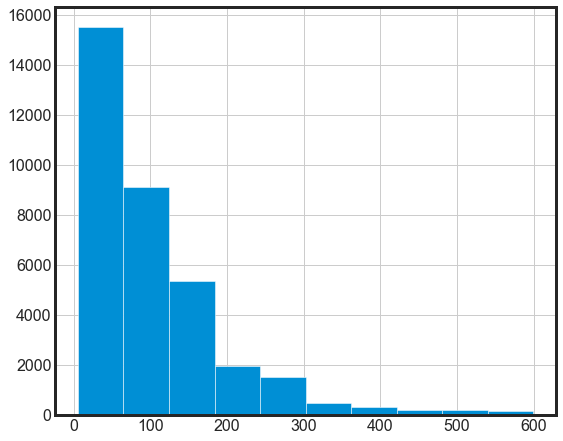

In [115]:
df_nyti.Duration_mins.hist()
df_nyti.Duration_mins
np.log(df_nyti.Duration_mins).hist()

#### Try to Capture Adverse Weather Types Using 'Weather_Description'
(THESE WEREN'T USED IN FINAL ANALYSIS, BUT LEAVING IN JUST IN CASE)

In [10]:
pd.unique(df_nyti['Weather_Condition'])

array(['Fair', 'Mostly Cloudy', 'Partly Cloudy', 'Snow', 'Cloudy',
       'Cloudy / Windy', 'Light Rain', 'Light Snow / Windy',
       'Light Rain / Windy', 'Fair / Windy', 'Wintry Mix', 'Light Snow',
       'Light Drizzle', 'Mostly Cloudy / Windy', 'Fog', 'Heavy Snow',
       'Rain', 'Patches of Fog', 'Heavy Snow / Windy', 'Haze',
       'Light Rain with Thunder', 'Sleet', 'Partly Cloudy / Windy',
       'Heavy Rain', 'Blowing Snow / Windy', 'Snow and Sleet',
       'Snow and Sleet / Windy', 'Mist', 'Shallow Fog', 'Rain / Windy',
       'Fog / Windy', 'Snow / Windy', 'Heavy Rain / Windy', 'T-Storm',
       'N/A Precipitation', 'Haze / Windy', 'Drizzle',
       'Light Drizzle / Windy', 'Thunder', 'Heavy T-Storm',
       'Patches of Fog / Windy', 'Thunder / Windy',
       'Thunder in the Vicinity', 'T-Storm / Windy', 'Drizzle and Fog',
       'Blowing Snow', 'Scattered Clouds', 'Overcast', 'Ice Pellets',
       'Light Freezing Rain', 'Light Ice Pellets', 'Light Freezing Fog',
       'Li

In [11]:
snow_ice = ['Snow', 'Light Snow / Windy', 'Light Snow', 'Heavy Snow', 'Heavy Snow / Windy', 'Blowing Snow / Windy', 'Snow and Sleet', 'Sleet', 'Snow / Windy', 
 'Snow and Sleet / Windy', 'Sleet', 'Blowing Snow', 'Ice Pellets', 'Light Ice Pellets', 'Light Freezing Rain', 'Light Freezing Drizzle']
rain = ['Light Rain', 'Light Rain / Windy', 'Rain', 'Light Rain with Thunder', 'Heavy Rain', 'Rain / Windy', 'Heavy Rain / Windy', 'Light Drizzle']
fog = ['Fog', 'Patches of Fog', 'Shallow Fog', 'Fog / Windy', 'Patches of Fog / Windy' 'Drizzle and Fog', 'Light Freezing Fog']
storm = ['T-Storm', 'Thunder', 'Heavy T-Storm', 'Thunder / Windy', 'Thunder in the Vicinity', 'T-Storm / Windy', 'Heavy T-Storm / Windy']

df_nyti['Adverse_Weather_Type'] = ''

df_nyti['Adverse_Weather_Type'].mask(df_nyti.Weather_Condition.isin(snow_ice), 'Snow/Ice', inplace=True)
df_nyti['Adverse_Weather_Type'].mask(df_nyti.Weather_Condition.isin(rain), 'Rain', inplace=True)
df_nyti['Adverse_Weather_Type'].mask(df_nyti.Weather_Condition.isin(fog), 'Fog', inplace=True)
df_nyti['Adverse_Weather_Type'].mask(df_nyti.Weather_Condition.isin(storm), 'Storm', inplace=True)

pd.unique(df_nyti['Adverse_Weather_Type'])

/tmp/ipykernel_18425/2600832161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyti['Adverse_Weather_Type'] = ''
/tmp/ipykernel_18425/2600832161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyti['Adverse_Weather_Type'].mask(df_nyti.Weather_Condition.isin(snow_ice), 'Snow/Ice', inplace=True)
/tmp/ipykernel_18425/2600832161.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

array(['', 'Snow/Ice', 'Rain', 'Fog', 'Storm'], dtype=object)

#### Create Variables for Date & Time Characteristics

In [12]:
df_nyti['Hour_of_Day'] = df_nyti.Start_Time.dt.hour
df_nyti['Day_of_Week'] = df_nyti.Start_Time.dt.dayofweek
df_nyti['Month_of_Year'] = df_nyti.Start_Time.dt.month

/tmp/ipykernel_18425/612089278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyti['Hour_of_Day'] = df_nyti.Start_Time.dt.hour
/tmp/ipykernel_18425/612089278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyti['Day_of_Week'] = df_nyti.Start_Time.dt.dayofweek
/tmp/ipykernel_18425/612089278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

#### Create Variable to Differentiate Between Time of Year (using seasons)

In [13]:
df_nyti['Time_of_Year'] = ''

# Differentiate time of year by season
for year in [2019,2020]:
    spring_start = dt.datetime(year, 3, 1, 0, 0, 0)
    summer_start = dt.datetime(year, 6, 1, 0, 0, 0)
    autumn_start = dt.datetime(year, 9, 1, 0, 0, 0)
    winter_start = dt.datetime(year, 12, 1, 0, 0, 0)
    df_nyti['Time_of_Year'].mask((df_nyti['Start_Time'] >= spring_start) & (df_nyti['Start_Time'] < summer_start), 'Spring', inplace=True)
    df_nyti['Time_of_Year'].mask((df_nyti['Start_Time'] >= summer_start) & (df_nyti['Start_Time'] < autumn_start), 'Summer', inplace=True)
    df_nyti['Time_of_Year'].mask((df_nyti['Start_Time'] >= autumn_start) & (df_nyti['Start_Time'] < winter_start), 'Autumn', inplace=True)
df_nyti['Time_of_Year'].mask(df_nyti['Time_of_Year'] == '', 'Winter', inplace=True)

/tmp/ipykernel_18425/3585515912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyti['Time_of_Year'] = ''
/tmp/ipykernel_18425/3585515912.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyti['Time_of_Year'].mask((df_nyti['Start_Time'] >= spring_start) & (df_nyti['Start_Time'] < summer_start), 'Spring', inplace=True)
/tmp/ipykernel_18425/3585515912.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [14]:
# verify data created for time of year
for year in [2019,2020]:
    for toy in ['Spring', 'Summer', 'Autumn', 'Winter']:
        mn = df_nyti[(df_nyti.Time_of_Year==toy) & (df_nyti.Start_Time.dt.year==year)]['Start_Time'].dt.date.min()
        mx = df_nyti[(df_nyti.Time_of_Year==toy) & (df_nyti.Start_Time.dt.year==year)]['Start_Time'].dt.date.max()
        print(f"| {year}-{toy} | {mn} | {mx} |")

| 2019-Spring | 2019-03-01 | 2019-05-31 |
| 2019-Summer | 2019-06-01 | 2019-08-31 |
| 2019-Autumn | 2019-09-01 | 2019-11-21 |
| 2019-Winter | 2019-01-03 | 2019-12-31 |
| 2020-Spring | 2020-03-01 | 2020-05-31 |
| 2020-Summer | 2020-06-01 | 2020-08-03 |
| 2020-Autumn | 2020-09-10 | 2020-11-30 |
| 2020-Winter | 2020-01-01 | 2020-12-31 |


#### Try to Extract Some Feautures from the 'Description' of the Incident
EXTRACTED MAIN AND AUXILIARY INTERSTATE ROADS
Matched pattern of I-98, I-984 etc... in the incident description
2 digit codes are main interstates, 3 digit codes are auxiliary interstate roads

In [15]:
# use regex to search for mentions interstates in the description e.g. I-78, I-90N, I-478 etc.
main = df_nyti.Description.str.extract(r'(\s[I]-[0-9]{2}[A-Z]?\s)')
aux = df_nyti.Description.str.extract(r'((\s[I]-[0-9]{3}\s))')

main.describe()
aux.describe()

# create dataframe with info extracted above
df = pd.DataFrame()
main = main.fillna('')
aux = aux.fillna('')
df['main'] = main[0]
df['aux'] = aux[0]
df['Route_Type'] = np.where(df.main!='', df.main, np.where(df.aux!='', df.aux, 'Other'))
df['Route_Type_Cat'] = np.where(df.main!='', 'I_Main', np.where(df.aux!='', 'I_Aux', 'Other'))
df1 = df[['Route_Type', 'Route_Type_Cat']]
df1 = pd.concat([df1, pd.get_dummies(df1['Route_Type_Cat'], prefix='Route')], axis=1)
df1

# join new above dataframe with new columns to main dataframe
df_nyti = pd.concat([df_nyti, df1], axis=1, join='outer')
df_nyti.head()

# Update the road_features variables
road_features = road_features + ['Route_I_Main', 'Route_I_Aux']

,0
count,5555
unique,8
top,I-87
freq,2114


,0,1
count,4161,4161
unique,20,20
top,I-495,I-495
freq,903,903


,Route_Type,Route_Type_Cat,Route_I_Aux,Route_I_Main,Route_Other
0,Other,Other,0,0,1
1,Other,Other,0,0,1
3,I-190,I_Aux,1,0,0
5,I-84,I_Main,0,1,0
6,Other,Other,0,0,1
...,...,...,...,...,...
39532,Other,Other,0,0,1
39533,Other,Other,0,0,1
39534,Other,Other,0,0,1
39535,Other,Other,0,0,1


,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,...,Adverse_Weather_Type,Hour_of_Day,Day_of_Week,Month_of_Year,Time_of_Year,Route_Type,Route_Type_Cat,Route_I_Aux,Route_I_Main,Route_Other
0,237351,A-2953957,2,2020-12-03 20:52:00,2020-12-03 22:17:27,43.119443,-75.293198,43.120291,-75.293547,0.061,...,,20,3,12,Winter,Other,Other,0,0,1
1,237362,A-2953968,2,2020-09-25 23:19:55,2020-09-25 23:41:46,40.834883,-73.866244,40.833773,-73.863254,0.174,...,,23,4,9,Autumn,Other,Other,0,0,1
3,237402,A-2954008,2,2020-10-03 02:58:56,2020-10-03 04:40:33,43.073669,-78.990615,43.075229,-78.990615,0.108,...,,2,5,10,Autumn,I-190,I_Aux,1,0,0
5,237470,A-2954079,2,2020-12-17 04:51:00,2020-12-17 06:54:34,41.519447,-74.023808,41.519377,-74.018308,0.285,...,Snow/Ice,4,3,12,Winter,I-84,I_Main,0,1,0
6,237508,A-2954117,2,2020-10-30 20:33:31,2020-10-31 01:56:42,40.934782,-73.865086,40.931725,-73.876216,0.618,...,,20,4,10,Autumn,Other,Other,0,0,1


# Descriptive Statistics & Data Viz

### Descriptive Statistics for Numerical Variables of Interest
Duration in minutes was chosen as the response variable

In [16]:
for col in ['Duration_mins', 'Distance.mi.'] + weather_numeric:
    print(f"Descriptive Statistics for {col}:")
    print(df_nyti[col].describe())

Descriptive Statistics for Duration_mins:
count    34992.000000
mean       104.819628
std         92.013223
min          5.500000
25%         30.000000
50%         79.110000
75%        137.127500
max        599.770000
Name: Duration_mins, dtype: float64
Descriptive Statistics for Distance.mi.:
count    34992.000000
mean         0.623769
std          1.569217
min          0.000000
25%          0.000000
50%          0.167000
75%          0.620000
max         49.240000
Name: Distance.mi., dtype: float64
Descriptive Statistics for Temperature.F.:
count    34992.000000
mean        52.348605
std         16.632859
min        -12.000000
25%         40.000000
50%         51.000000
75%         65.000000
max         96.000000
Name: Temperature.F., dtype: float64
Descriptive Statistics for Wind_Chill.F.:
count    34992.000000
mean        49.777681
std         19.383699
min        -30.400000
25%         35.000000
50%         51.000000
75%         65.000000
max         96.000000
Name: Wind_Chill.F.,

### Correlation Matrix
There is some correlation between the weather variables, and some between the lat & lng values, that we would expect.
But no correlation between Duration and the other continuous (numeric) variables.

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Heatmap for numerical Variables')

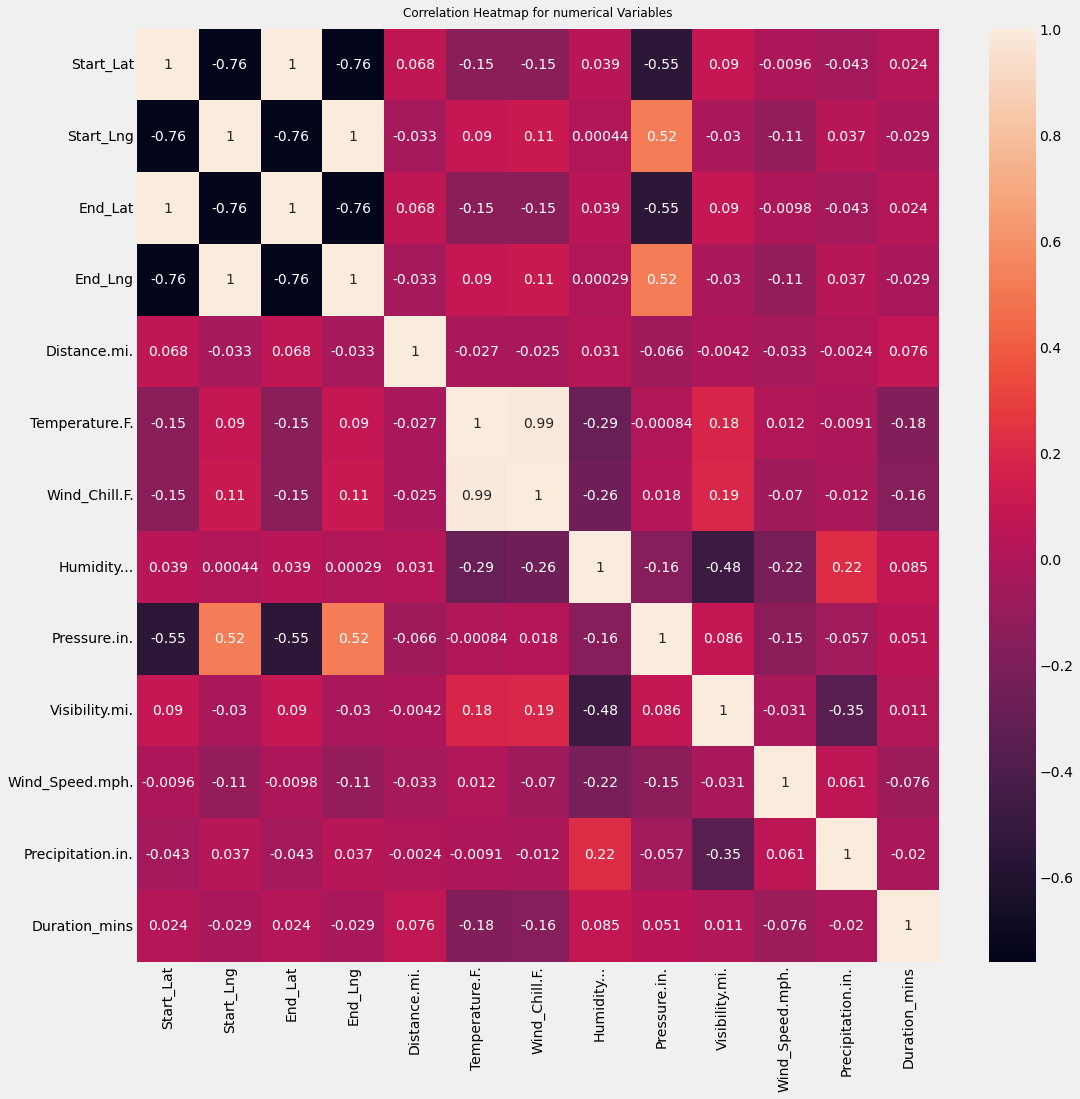

In [17]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_nyti[numerical + ['Duration_mins']].corr(), annot=True)
plt.title('Correlation Heatmap for numerical Variables', fontdict={'fontsize':12}, pad=12)

### Traffic Incidents Timeline

Some analysis to compare the number of incidents and duration of incident across the date range in the dataset

In [18]:
# Calculate the mean duration and number of incidents grouped by time of year (season)
totalN = len(df_nyti)
df_time_of_year_stats = df_nyti.groupby([df_nyti['Time_of_Year']]).agg(
    duration_mean = pd.NamedAgg(column='Duration_mins', aggfunc='mean'),
    N = pd.NamedAgg(column='ID', aggfunc='count')
)
df_time_of_year_stats['%'] = round(df_time_of_year_stats.N / totalN, 2)
df_time_of_year_stats

,duration_mean,N,%
Time_of_Year,,,
Autumn,154.696244,12124,0.35
Spring,49.194931,9776,0.28
Summer,49.094789,5318,0.15
Winter,135.103603,7774,0.22


,Duration_mins
Start_Time,
2020-12-03 20:52:00,85.45
2020-09-25 23:19:55,21.85
2020-10-15 12:17:30,926.50
2020-10-03 02:58:56,101.62
2020-12-17 04:51:00,123.57


<Figure size 864x576 with 0 Axes>

Text(0, 0.5, '')

Text(0.5, 0, '')

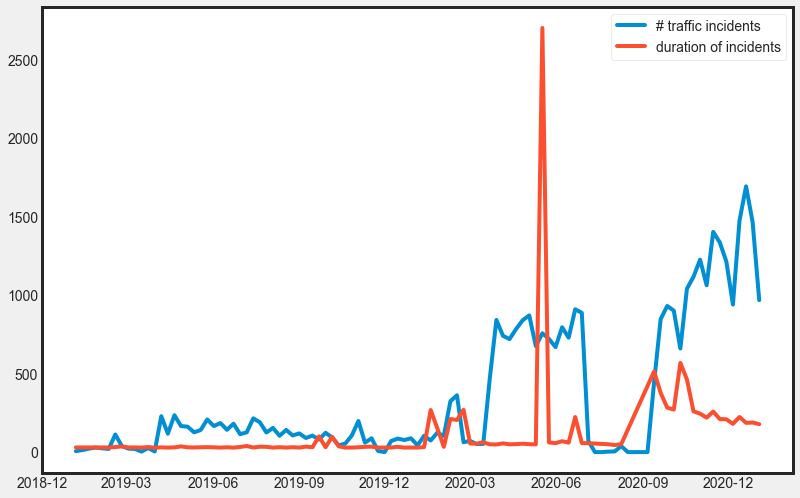

In [19]:
# create plots comparing # incidents and duration for the untrimmed dataset
df_inc_dates = df_nyti_untrimmed[['Start_Time','Duration_mins']]
df_inc_dates = df_inc_dates.set_index('Start_Time')
df_inc_dates.head()
df = df_inc_dates.resample('1W').count()
df1 = df_inc_dates.resample('1W').mean()

import seaborn as sns, matplotlib.dates as mdates
plt.figure(figsize=(12, 8))
sns.set_style('ticks')
ax = sns.lineplot(x='Start_Time', y='Duration_mins', data=df.reset_index(), label='# traffic incidents')
ax = sns.lineplot(x='Start_Time', y='Duration_mins', data=df1.reset_index(), label='duration of incidents')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend()

,Duration_mins
Start_Time,
2020-12-03 20:52:00,85.45
2020-09-25 23:19:55,21.85
2020-10-03 02:58:56,101.62
2020-12-17 04:51:00,123.57
2020-10-30 20:33:31,323.18


<Figure size 864x576 with 0 Axes>

Text(0, 0.5, '')

Text(0.5, 0, '')

Text(2019-08-08 00:00:00, 1575, 'NYS On Pause Program Begins')

Text(2020-06-16 00:00:00, 1625, 'NYC Begins Phase 4 Reopening')

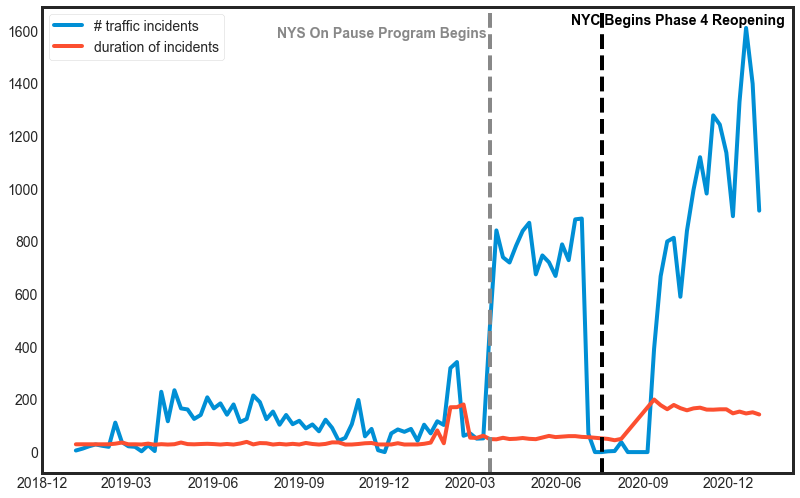

In [20]:
# create plots comparing # incidents and duration for the trimmed dataset
df_inc_dates = df_nyti[['Start_Time','Duration_mins']]
df_inc_dates = df_inc_dates.set_index('Start_Time')
df_inc_dates.head()
df = df_inc_dates.resample('1W').count()
df1 = df_inc_dates.resample('1W').mean()

import seaborn as sns, matplotlib.dates as mdates
plt.figure(figsize=(12, 8))
sns.set_style('ticks')
ax = sns.lineplot(x='Start_Time', y='Duration_mins', data=df.reset_index(), label='# traffic incidents')
ax = sns.lineplot(x='Start_Time', y='Duration_mins', data=df1.reset_index(), label='duration of incidents')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend()

# add some indicators for important dates in NY covid quarantine to see if they appear to correlate with the trends in the plots
# https://www.investopedia.com/historical-timeline-of-covid-19-in-new-york-city-5071986
plt.axvline(dt.datetime(2020, 3, 22, 0, 0), color='#888888', linestyle='--')
plt.text(dt.datetime(2019, 8, 8, 0, 0), 1575, 'NYS On Pause Program Begins', fontsize=14, weight='bold', c='#888888')
plt.axvline(dt.datetime(2020, 7, 19, 0, 0), color='k', linestyle='--')
plt.text(dt.datetime(2020, 6, 16, 0, 0, 0), 1625, 'NYC Begins Phase 4 Reopening', fontsize=14, weight='bold', c='k')
plt.show()

### Location of Incidents

#### Frequency by County

In [21]:
# calculate # incidents grouped by NY county (and mean duration)
totalN = len(df_nyti)
df_county_stats = df_nyti.groupby([df_nyti['County']]).agg(
    duration_mean = pd.NamedAgg(column='Duration_mins', aggfunc='mean'),
    N = pd.NamedAgg(column='Duration_mins', aggfunc='count')
)
df_county_stats['%'] = df_county_stats.N / totalN
df_county_stats.sort_values(by=['N'], inplace=True, ascending=False)
df_county_stats.head(20)
#df_county_stats.tail(20)

,duration_mean,N,%
County,,,
Monroe,108.746438,5376,0.153635
Queens,101.456244,3464,0.098994
Westchester,103.741833,3382,0.096651
Bronx,115.966979,2628,0.075103
Nassau,78.687149,2518,0.071959
Suffolk,77.193550,1952,0.055784
Onondaga,80.956477,1876,0.053612
New York,127.748606,1858,0.053098
Erie,111.748277,1312,0.037494


#### Frequency by Route Type

In [22]:
# calculate # incidents grouped by Interstate name (and mean duration)
totalN = len(df_nyti)
df_rtt_stats = df_nyti.groupby([df_nyti['Route_Type']]).agg(
    mean_duration = ('Duration_mins', 'mean'),
    N = ('Duration_mins', 'count')
)
df_rtt_stats['N_pct'] = df_rtt_stats.N / totalN
df_rtt_stats.sort_values(by=['N'], inplace=True, ascending=False)
df_rtt_stats

,mean_duration,N,N_pct
Route_Type,,,
Other,86.824349,25590,0.731310
I-87,155.709385,2114,0.060414
I-90,161.143180,1720,0.049154
I-95,185.912865,1110,0.031722
I-495,157.648915,903,0.025806
I-278,153.313329,862,0.024634
I-490,111.068834,326,0.009316
I-678,186.203271,321,0.009174
I-84,125.457321,321,0.009174


,Route_Type_Cat,duration_mean,N,N_pct,duration_mean_pct
0,I_Main,159.829168,5555,0.16,0.0
1,I_Aux,145.090273,3847,0.11,0.0
2,Other,86.824349,25590,0.73,0.0


<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780ceffc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780ce8c3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780ceff8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780ce8caf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780ce94250>,
 'means': [<matplotlib.lines.Line2D at 0x7f780ce8ce80>,
  <matplotlib.lines.Line2D at 0x7f780ceae8b0>]}

Text(0.5, 0, 'Duration (mins)')

Text(0, 0.5, 'Route Type')

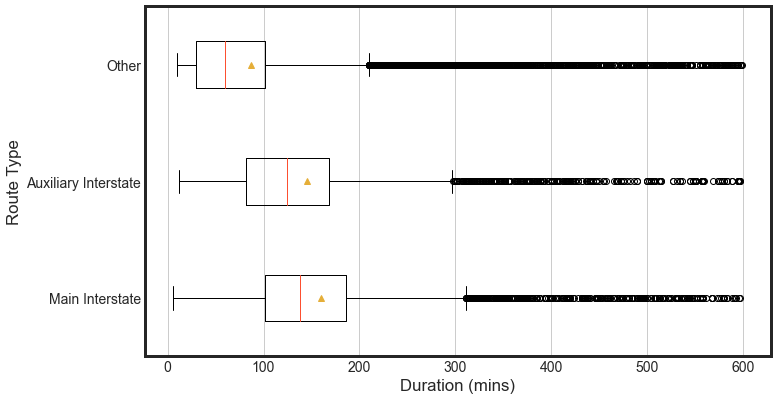

In [23]:
df_route_stats = df_nyti.groupby([df_nyti['Route_Type_Cat']]).agg(
    duration_mean=("Duration_mins", "mean"),
    N=("Duration_mins", "count")
)
df_route_stats['N_pct'] = round(df_route_stats.N / totalN, 2)
df_route_stats['duration_mean_pct'] = round(df_route_stats.duration_mean / totalN, 2)

df_route_stats = df_route_stats.sort_values(by='duration_mean', ascending=False).reset_index()
df_route_stats

# plot bloxplts for duration per hour
route_cat = ['I_Main', 'I_Aux', 'Other']
route_labels = ['Main Interstate', 'Auxiliary Interstate', 'Other']
plt.figure(figsize=(10, 6))
data = [df_nyti.Duration_mins[df_nyti.Route_Type_Cat == cat] for cat in route_cat]
ax = plt.subplot()
ax.boxplot(data, vert=False, widths=0.4, labels=route_labels, showmeans=True)
ax.set_xlabel("Duration (mins)")
ax.set_ylabel("Route Type")
plt.grid(axis="x")
plt.show()

### Adverse Weather Conditions

There doesn't seem to be much difference between the different types of weather conditions, apart from storms where duration tends to much lower (maybe because people are less inclined to drive during a storm?). Given this plus the lack of correlation between the duration and the weather measurements (shown in the correlation matrix earlier), seems to suggest that it would be more useful to focus on other areas (like the differences in time of day\week\year) in the analysis.

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c760dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c771520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c760a30>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c771c40>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c77d3a0>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c771fd0>,
  <matplotlib.lines.Line2D at 0x7f780c6cc3d0>]}

Text(0.5, 0, 'Duration (mins)')

Text(0, 0.5, 'Adverse Weather Type')

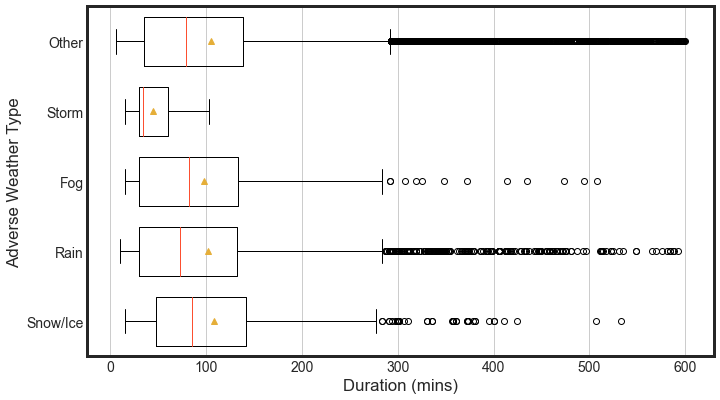

In [25]:
plt.figure(figsize=(10, 6))

labels = ['Snow/Ice', 'Rain', 'Fog', 'Storm', 'Other']
categories = ['Snow/Ice', 'Rain', 'Fog', 'Storm', '']
data = [df_nyti.Duration_mins[df_nyti.Adverse_Weather_Type == cat] for cat in categories]
ax = plt.subplot()
ax.boxplot(data, labels=labels, vert=False, widths=0.7, showmeans=True)
ax.set_xlabel("Duration (mins)")
ax.set_ylabel("Adverse Weather Type")
plt.grid(axis="x")
plt.show()

### Which Road Features are Most Frequent?

In [26]:
# calculate # incidents grouped by features related to roads i.e. traffic signals etc.
featuresN = []
totalN = len(df_nyti)
for rf in road_features:
    rfN = df_nyti[rf][df_nyti[rf]==True].count()
    featuresN.append([rf, rfN, round(rfN/totalN,2)])
df_rfN = pd.DataFrame(featuresN, columns=['Feature', 'N', '%'])
df_rfN.sort_values(by='N', ascending=False)

,Feature,N,%
13,Route_I_Main,5555,0.16
11,Traffic_Signal,5454,0.16
4,Junction,5351,0.15
14,Route_I_Aux,3847,0.11
2,Crossing,1774,0.05
0,Amenity,717,0.02
8,Station,539,0.02
9,Stop,438,0.01
6,Railway,233,0.01
3,Give_Way,122,0.00


#### ROAD FEATURES CHARACTERISTICS

From visual inspection of the boxplots, it appears that I_Main, I_Aux and Traffic_Signal have the largest impact on delays, so we'll focus on those in the analysis.

<Figure size 432x288 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c649460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c649a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c6490d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c6551c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c6558e0>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c655550>,
  <matplotlib.lines.Line2D at 0x7f780c66b250>]}

Text(0.5, 0, 'Delay (mins)')

Text(0, 0.5, 'Route_I_Main')

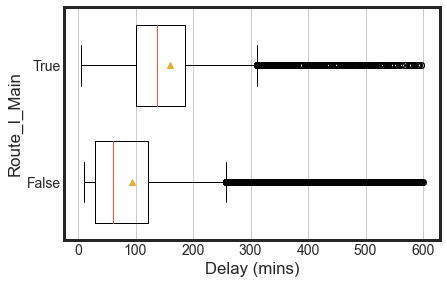

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c5cc670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c5ccd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c5cc3a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c5d84f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c5d8c10>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c5d8880>,
  <matplotlib.lines.Line2D at 0x7f780c5ef580>]}

Text(0.5, 0, 'Delay (mins)')

Text(0, 0.5, 'Route_I_Aux')

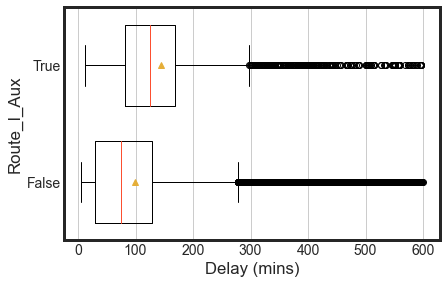

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c54f910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c55a070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c54f640>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c55a790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c55aeb0>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c55ab20>,
  <matplotlib.lines.Line2D at 0x7f780c572820>]}

Text(0.5, 0, 'Delay (mins)')

Text(0, 0.5, 'Traffic_Signal')

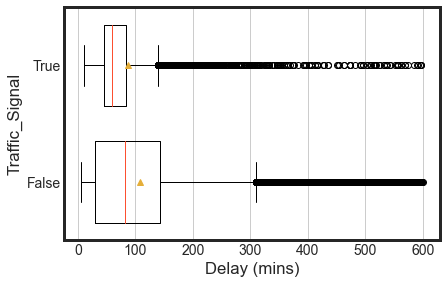

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c4cdbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c4dd310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c4cd8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c4dda30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c4ea190>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c4dddc0>,
  <matplotlib.lines.Line2D at 0x7f780c4f3ac0>]}

Text(0.5, 0, 'Delay (mins)')

Text(0, 0.5, 'Junction')

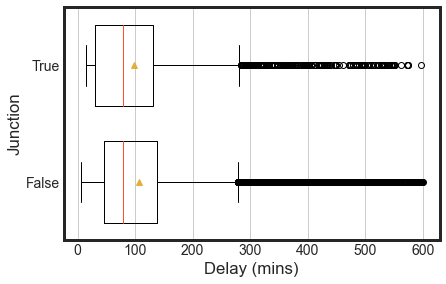

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c450e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c45e5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c450b80>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c45ecd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c46d430>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c46d0a0>,
  <matplotlib.lines.Line2D at 0x7f780c475d60>]}

Text(0.5, 0, 'Delay (mins)')

Text(0, 0.5, 'Crossing')

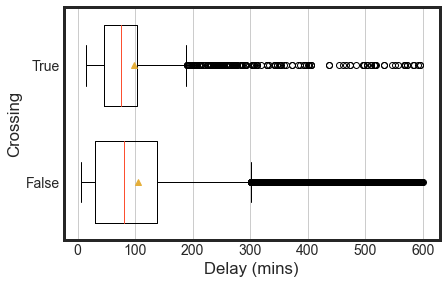

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c3e11c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c3e18e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c3d2eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c3ee040>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c3ee760>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c3ee3d0>,
  <matplotlib.lines.Line2D at 0x7f780c3850d0>]}

Text(0.5, 0, 'Delay (mins)')

Text(0, 0.5, 'Amenity')

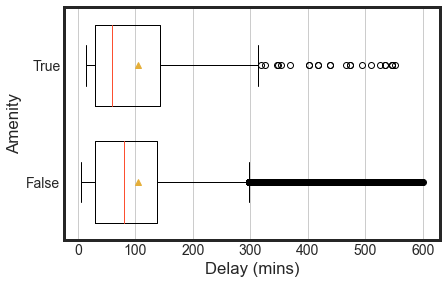

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c364490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c364bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c3641c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c36f310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c36fa30>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c36f6a0>,
  <matplotlib.lines.Line2D at 0x7f780c3053a0>]}

Text(0.5, 0, 'Delay (mins)')

Text(0, 0.5, 'Station')

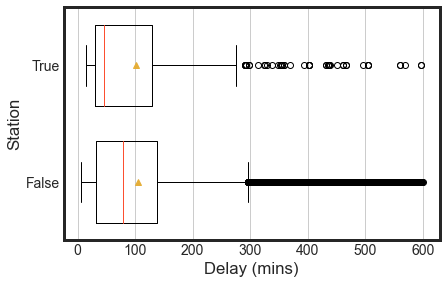

In [27]:
# We'll just look at those with > 500 incidents
plt.figure(figsize=(6, 4))
for rf in ['Route_I_Main', 'Route_I_Aux','Traffic_Signal', 'Junction', 'Crossing', 'Amenity', 'Station']:
    data = [df_nyti.Duration_mins[df_nyti[rf] == cat] for cat in [False, True]]
    ax = plt.subplot()
    ax.boxplot(data, labels=[False, True], vert=False, widths=0.7, showmeans=True)
    ax.set_xlabel("Delay (mins)")
    ax.set_ylabel(rf)
    plt.grid(axis="x")
    plt.show()

Perform Welch test since the variances are not homogenous (based on result above)

### Date & Time Characteristics

In [28]:
df_dt = df_nyti[['Start_Time', 'Duration_mins', 'Hour_of_Day', 'Day_of_Week', 'Month_of_Year']]

From visual inspection of the boxplots, it appears that seasonal changes, night and day changes, and maybe the difference between weekday and weekend, are most significant.

#### Part of the Day

,Hour_of_Day,duration_mean,N,N_pct
0,2,141.138656,1064,0.03
1,1,135.104271,1365,0.04
2,3,134.812656,900,0.03
3,22,129.062208,1300,0.04
4,23,128.181883,1349,0.04
5,21,126.612914,1304,0.04
6,4,123.771032,853,0.02
7,5,121.417027,989,0.03
8,13,121.003590,1802,0.05
9,20,120.360065,1375,0.04


<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'Hour of Day (24Hr)')

Text(0, 0.5, '# Incidents')

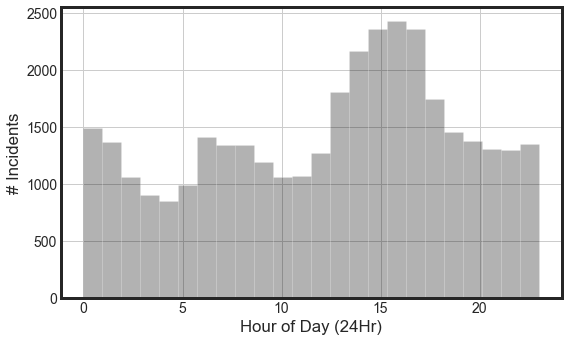

<Figure size 1008x792 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c1ee700>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c1eee20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c1ee310>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c1fc580>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c1fcca0>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c1fc910>,
  <matplotlib.lines.Line2D at 0x7f780b3cd100>]}

Text(0.5, 0, 'Duration (mins)')

Text(0, 0.5, 'Hour of Day')

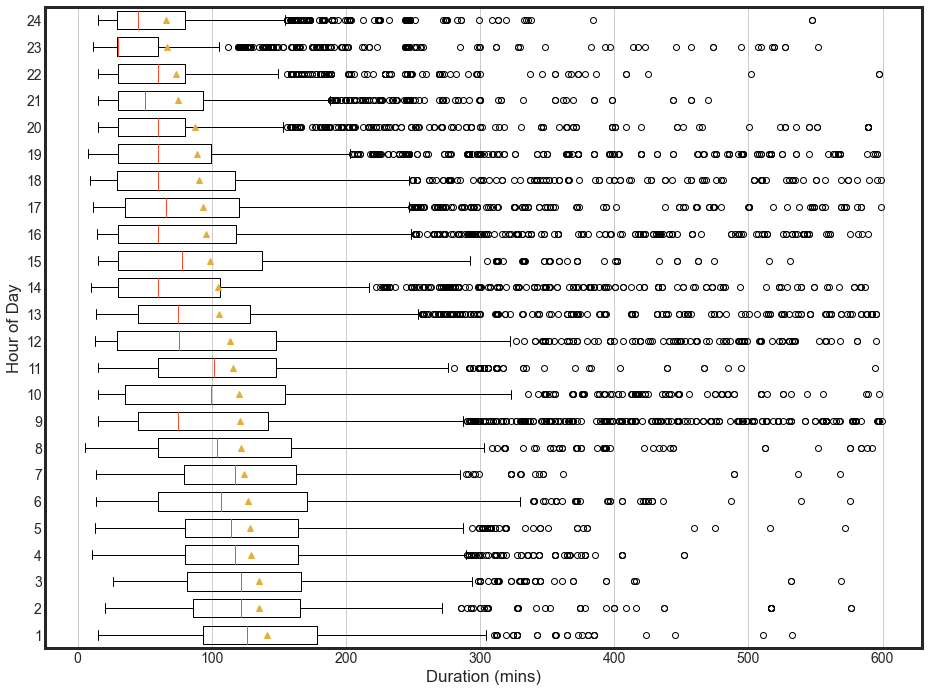

In [29]:
# calculate # incidents grouped by hour of the day (and mean duration)
df_hourofday_stats = df_dt.groupby([df_dt['Hour_of_Day']]).agg(
    duration_mean=("Duration_mins", "mean"),
    N=("Duration_mins", "count")
)
df_hourofday_stats['N_pct'] = round(df_hourofday_stats.N / totalN, 2)
df_hourofday_stats = df_hourofday_stats.sort_values(by='duration_mean', ascending=False).reset_index()
df_hourofday_stats

# plot distribution of # incidents per hour and mean duration per hour
plt.figure(figsize=(8, 5))
ax = df_dt['Hour_of_Day'].hist(bins=24, color="k", alpha=0.3)
ax.set_xlabel('Hour of Day (24Hr)')
ax.set_ylabel("# Incidents")
plt.show()

# plot bloxplts for duration per hour
plt.figure(figsize=(14, 11))
data = [df_dt.Duration_mins[df_dt.Hour_of_Day == cat] for cat in pd.unique(df_hourofday_stats.Hour_of_Day)]
ax = plt.subplot()
ax.boxplot(data, vert=False, widths=0.7, showmeans=True)
ax.set_xlabel("Duration (mins)")
ax.set_ylabel("Hour of Day")
plt.grid(axis="x")
plt.show()

<Figure size 576x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780b0ca430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780b0caa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780b0ca0a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780b0d71c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780b0d78e0>,
 'means': [<matplotlib.lines.Line2D at 0x7f780b0d7550>,
  <matplotlib.lines.Line2D at 0x7f780b039610>]}

Text(0.5, 0, 'Duration (mins)')

Text(0, 0.5, 'Part of Day')

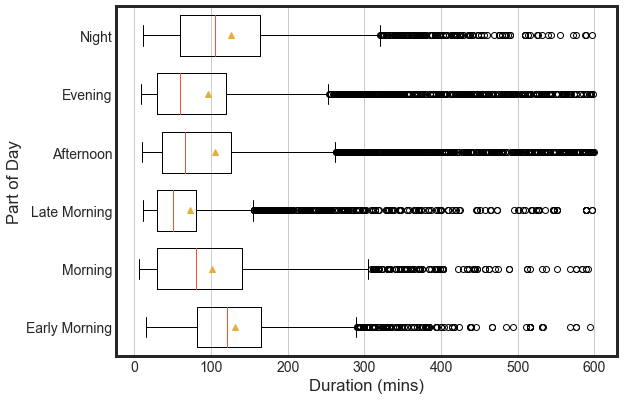

In [30]:
categories = ['Early Morning', 'Morning', 'Late Morning', 'Afternoon', 'Evening', 'Night']
conditions = [
    df_nyti['Hour_of_Day'].ge(0) & df_nyti['Hour_of_Day'].lt(4),
    df_nyti['Hour_of_Day'].ge(4) & df_nyti['Hour_of_Day'].lt(8),
    df_nyti['Hour_of_Day'].ge(8) & df_nyti['Hour_of_Day'].lt(12),
    df_nyti['Hour_of_Day'].ge(12) & df_nyti['Hour_of_Day'].lt(16),
    df_nyti['Hour_of_Day'].ge(16) & df_nyti['Hour_of_Day'].lt(20),
    df_nyti['Hour_of_Day'].ge(20),
]
df_nyti['Part_of_Day'] = np.select(conditions, categories)

response = 'Duration_mins'
plt.figure(figsize=(8, 6))
data = [df_nyti[response][df_nyti.Part_of_Day == cat] for cat in categories]
ax = plt.subplot()
ax.boxplot(data, labels=categories, vert=False, widths=0.7, showmeans=True)
ax.set_xlabel("Duration (mins)")
ax.set_ylabel("Part of Day")
plt.grid(axis="x")
plt.show()

<Figure size 576x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780c246df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c274040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c246c70>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c274910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c321370>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c274e20>,
  <matplotlib.lines.Line2D at 0x7f780c398940>]}

Text(0.5, 0, 'Duration (mins)')

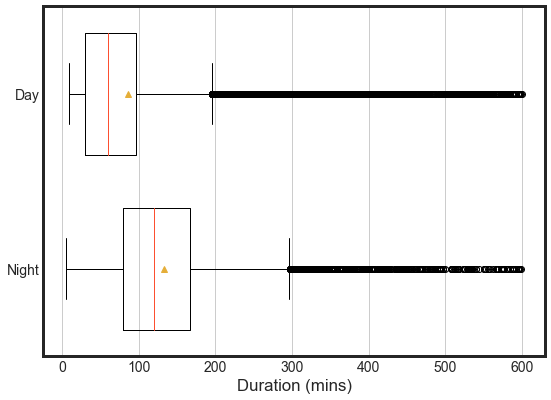

In [31]:
# use 'Civil_Twilight'
categories = ['Night', 'Day']

response = 'Duration_mins'
plt.figure(figsize=(8, 6))
data = [df_nyti[response][df_nyti.Civil_Twilight == cat] for cat in categories]
ax = plt.subplot()
ax.boxplot(data, labels=categories, vert=False, widths=0.7, showmeans=True)
ax.set_xlabel("Duration (mins)")
plt.grid(axis="x")
plt.show()

#### Part of the Week

<Figure size 576x360 with 0 Axes>

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, '# Incidents')

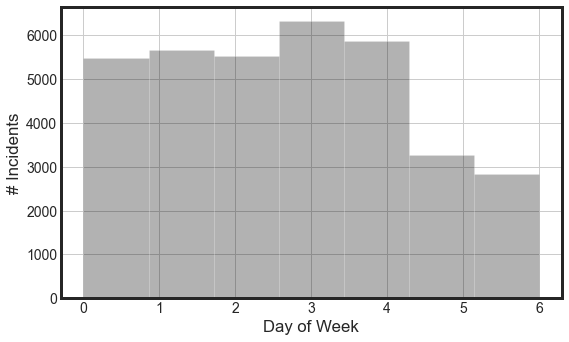

<Figure size 576x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780ceba1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f780c6cc9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780c66b160>,
 'medians': [<matplotlib.lines.Line2D at 0x7f780c688df0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780c7a9460>,
 'means': [<matplotlib.lines.Line2D at 0x7f780c6ea6d0>,
  <matplotlib.lines.Line2D at 0x7f780c5d0040>]}

Text(0.5, 0, 'Duration (mins)')

Text(0, 0.5, 'Part of Week')

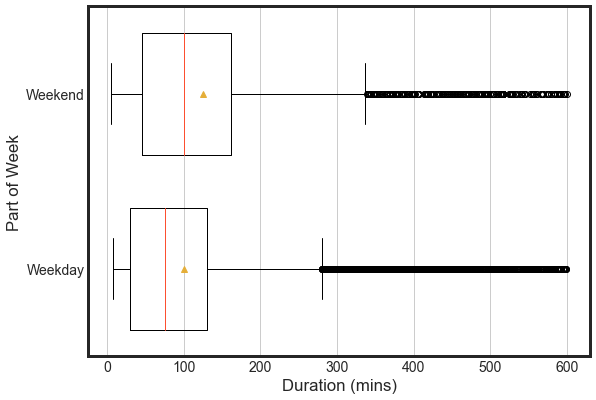

In [32]:
# plot distribution of # incidents per week and mean duration per week
plt.figure(figsize=(8, 5))
ax = df_dt['Day_of_Week'].hist(bins=7, color="k", alpha=0.3)
ax.set_xlabel('Day of Week')
ax.set_ylabel("# Incidents")
plt.show()

categories = ['Weekday', 'Weekend']
conditions = [
    df_nyti['Day_of_Week'].ge(0) & df_nyti['Day_of_Week'].lt(5),
    df_nyti['Day_of_Week'].ge(5)
]
df_nyti['Part_of_Week'] = np.select(conditions, categories)

response = 'Duration_mins'
plt.figure(figsize=(8, 6))
data = [df_nyti[response][df_nyti.Part_of_Week == cat] for cat in categories]
ax = plt.subplot()
ax.boxplot(data, labels=categories, vert=False, widths=0.7, showmeans=True)
ax.set_xlabel("Duration (mins)")
ax.set_ylabel("Part of Week")
plt.grid(axis="x")
plt.show()

#### Part of the Year

<Figure size 576x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f780197a9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7801988100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f780197a5e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7801988820>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7801988f40>,
 'means': [<matplotlib.lines.Line2D at 0x7f7801988bb0>,
  <matplotlib.lines.Line2D at 0x7f78019492b0>]}

Text(0.5, 0, 'Duration (mins)')

Text(0, 0.5, 'Time of Year')

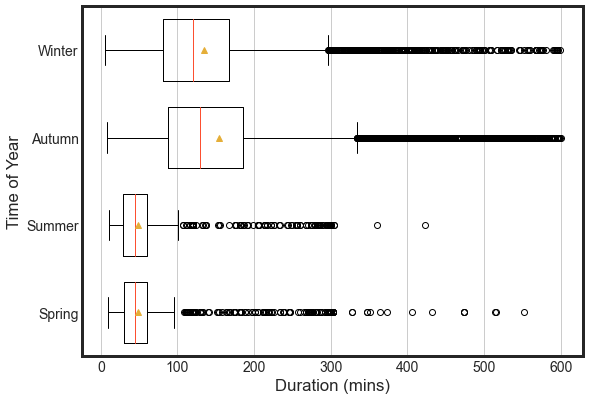

In [33]:
response = 'Duration_mins'

plt.figure(figsize=(8, 6))
categories = ["Spring", "Summer", "Autumn", "Winter"]
data = [df_nyti[response][df_nyti.Time_of_Year == cat] for cat in categories]
ax = plt.subplot()
ax.boxplot(data, labels=categories, vert=False, widths=0.7, showmeans=True)
ax.set_xlabel("Duration (mins)")
ax.set_ylabel("Time of Year")
plt.grid(axis="x")
plt.show()

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7801927a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78018b71c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78019276d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f78018b78e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f78018c2040>,
 'means': [<matplotlib.lines.Line2D at 0x7f78018b7c70>,
  <matplotlib.lines.Line2D at 0x7f7801890070>]}

Text(0.5, 0, 'Duration (mins)')

Text(0, 0.5, 'Adverse Weather Type')

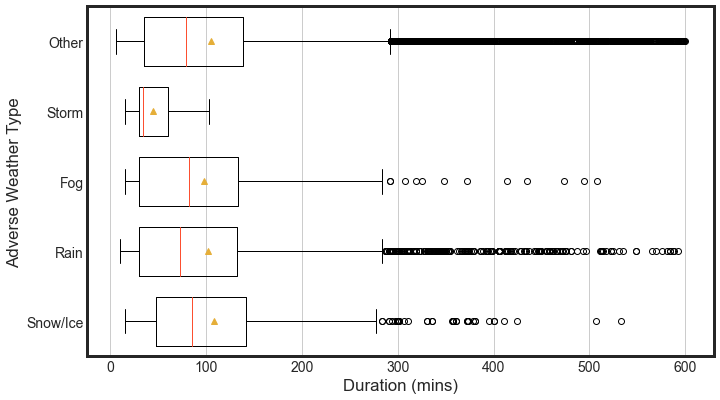

In [34]:
plt.figure(figsize=(10, 6))

labels = ['Snow/Ice', 'Rain', 'Fog', 'Storm', 'Other']
categories = ['Snow/Ice', 'Rain', 'Fog', 'Storm', '']
data = [df_nyti.Duration_mins[df_nyti.Adverse_Weather_Type == cat] for cat in categories]
ax = plt.subplot()
ax.boxplot(data, labels=labels, vert=False, widths=0.7, showmeans=True)
ax.set_xlabel("Duration (mins)")
ax.set_ylabel("Adverse Weather Type")
plt.grid(axis="x")
plt.show()

# Analysis & Results

## T-Tests

### Weekday & Weekend

Perform Levene's & Bartlett's test for variance homegeneity

In [35]:
stat, p = stats.levene(
    df_nyti[df_nyti['Part_of_Week']=='Weekend']['Duration_mins'], 
    df_nyti[df_nyti['Part_of_Week']=='Weekday']['Duration_mins']
)
print("Levene's test statistic for weekday\weekend: W = {:.4f}; p-value = {:.4e}".format(stat, p))

stat, p = stats.bartlett(
    df_nyti[df_nyti['Part_of_Week']=='Weekend']['Duration_mins'], 
    df_nyti[df_nyti['Part_of_Week']=='Weekday']['Duration_mins']
)
print("Bartlett's test statistic for weekday\weekend: chi_sq = {:.4f}; p-value = {:.4e}".format(stat, p))

Levene's test statistic for weekday\weekend: W = 145.2584; p-value = 2.1962e-33
Bartlett's test statistic for weekday\weekend: chi_sq = 244.5563; p-value = 3.9926e-55


The null hypothesis is that the variance of the traffic incident duration between the groups where the incident was on a weekday and when it was on the weekend, is equal i.e.
$$H_0: \sigma_{duration,weekday}^2=\sigma_{duration,weekend}^2$$
$$H_1: \neg H_O$$
Both tests produced a very small p-value (p<.001), suggesting that it is very unlikely that the variances are equal in traffic incident durations between the groups where the incident occured on a weekday and those on the weekend. So we can reject the null hypothesis and assume that the variances are not homogeneous.

Given the above, perform a Welch test to compare the means.

In [36]:
stat, p = stats.ttest_ind(
    df_nyti[df_nyti['Part_of_Week']=='Weekend']['Duration_mins'], 
    df_nyti[df_nyti['Part_of_Week']=='Weekday']['Duration_mins'],
    equal_var=False
)
stat
p
wdm = df_nyti[df_nyti['Part_of_Week']=='Weekend']['Duration_mins'].mean()
wds = df_nyti[df_nyti['Part_of_Week']=='Weekend']['Duration_mins'].std()
wem = df_nyti[df_nyti['Part_of_Week']=='Weekday']['Duration_mins'].mean()
wes = df_nyti[df_nyti['Part_of_Week']=='Weekday']['Duration_mins'].std()

print(f"The difference in duration between traffic incidents that occur on weekdays (M = {wdm:.2f}, SD = {wds:.2f}) and those on weekends (M = {wem:.2f}, SD = {wes:.2f}) is significant (t = {stat:.2f}, p < .001).")

17.11048164395081

1.6481190931481882e-64

The difference in duration between traffic incidents that occur on weekdays (M = 124.87, SD = 103.31) and those on weekends (M = 100.57, SD = 88.86) is significant (t = 17.11, p < .001).


The null hypothesis is that the mean of the traffic incident duration between the groups when the traffic incident occured on a weekday and those on the weekend, is equal i.e.
$$H_0: \mu_{duration,weekend}=\mu_{duration,weekday}$$
$$H_1: \neg H_O$$
The difference in duration between traffic incidents that occur on weekdays (M = 124.87, SD = 103.31) and those on weekends (M = 100.57, SD = 88.86) is significant (t = 17.11, p < .001).

### Night & Day

Perform Levene's & Bartlett's test for variance homegeneity

In [37]:
stat, p = stats.levene(
    df_nyti[df_nyti['Civil_Twilight']=='Night']['Duration_mins'], 
    df_nyti[df_nyti['Civil_Twilight']=='Day']['Duration_mins']
)
print("Levene's test statistic for night\day: W = {:.4f}; p-value = {:.4e}".format(stat, p))

stat, p = stats.bartlett(
    df_nyti[df_nyti['Civil_Twilight']=='Night']['Duration_mins'], 
    df_nyti[df_nyti['Civil_Twilight']=='Day']['Duration_mins']
)
print("Bartlett's test statistic for night\day: chi_sq = {:.4f}; p-value = {:.4e}".format(stat, p))

Levene's test statistic for night\day: W = 185.7904; p-value = 3.3816e-42
Bartlett's test statistic for night\day: chi_sq = 22.7568; p-value = 1.8385e-06


The null hypothesis is that the variance of the traffic incident duration is equal between the groups where the incident was during the night and when it was during the day i.e.
$$H_0: \sigma_{duration,night}^2=\sigma_{duration,day}^2$$
$$H_1: \neg H_O$$
Both tests produced a very small p-value (p<.001), suggesting that it is very unlikely that the variances are equal in traffic incident durations between the groups where the incident occured during the night those on during the day. So we can reject the null hypothesis and assume that the variances are not homogeneous.

Given the above, perform a Welch test to compare the means.

In [38]:
stat, p = stats.ttest_ind(
    df_nyti[df_nyti['Civil_Twilight']=='Night']['Duration_mins'], 
    df_nyti[df_nyti['Civil_Twilight']=='Day']['Duration_mins'],
    equal_var=False
)
stat
p
wdm = df_nyti[df_nyti['Civil_Twilight']=='Night']['Duration_mins'].mean()
wds = df_nyti[df_nyti['Civil_Twilight']=='Night']['Duration_mins'].std()
wem = df_nyti[df_nyti['Civil_Twilight']=='Day']['Duration_mins'].mean()
wes = df_nyti[df_nyti['Civil_Twilight']=='Day']['Duration_mins'].std()

print(f"The difference in duration between traffic incidents that occur during the night (M = {wdm:.2f}, SD = {wds:.2f}) and those during the day (M = {wem:.2f}, SD = {wes:.2f}) is significant (t = {stat:.2f}, p < .001).")

48.76223985828143

0.0

The difference in duration between traffic incidents that occur during the night (M = 133.11, SD = 87.10) and those during the day (M = 86.04, SD = 90.37) is significant (t = 48.76, p < .001).


The null hypothesis is that the mean of the traffic incident duration is equal between the groups when the traffic incident occured during the night and those during the day i.e.
$$H_0: \mu_{duration,night}=\mu_{duration,day}$$
$$H_1: \neg H_O$$
The difference in duration between traffic incidents that occur during the night (M = 133.11, SD = 87.10) and those during the day (M = 86.04, SD = 90.37) is significant (t = 48.76, p < .001).

## ANOVA

### Time of Year

In [39]:
stat, p = stats.f_oneway(
    df_nyti[df_nyti['Time_of_Year']=='Winter']['Duration_mins'],
    df_nyti[df_nyti['Time_of_Year']=='Spring']['Duration_mins'],
    df_nyti[df_nyti['Time_of_Year']=='Summer']['Duration_mins'],
    df_nyti[df_nyti['Time_of_Year']=='Autumn']['Duration_mins']
)
print("test statistic F = {:.4f}; p-value = {:.4e}".format(stat, p))

test statistic F = 4619.6273; p-value = 0.0000e+00


The null hypothesis is that the mean of the traffic incident duration between the groups where the incident was in spring, summer, autumn or winter, is equal i.e.
$$H_0: \sigma_{duration,spring}^2=\sigma_{duration,summer}^2=\sigma_{duration,autumn}^2=\sigma_{duration,winter}^2$$
$$H_1: \neg H_O$$

There is as ignificant relationship between the duration of a traffic incident and the time of year (season) (F = 4619.63, p<.001).

Normally should do a post-hoc comparison, there are examples in the lecture notes if someone wants to do this. It seemed clear in the box-plots that autumn and winter were different, but to be thorough we should add post-hoc analysis here.

#### Posthoc Analysis

In [40]:
comp = MultiComparison(df_nyti['Duration_mins'], df_nyti['Time_of_Year']).tukeyhsd().summary()
print(comp)
comp1 = MultiComparison(df_nyti['Duration_mins'], df_nyti['Time_of_Year']).allpairtest(stats.ttest_ind, method='Holm')
print(comp1[0])

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
Autumn Spring -105.5013   -0.0  -108.221 -102.7816   True
Autumn Summer -105.6015   -0.0 -108.8923 -102.3107   True
Autumn Winter  -19.5926   -0.0  -22.4997  -16.6855   True
Spring Summer   -0.1001 0.9998   -3.5093     3.309  False
Spring Winter   85.9087   -0.0   82.8682   88.9491   True
Summer Winter   86.0088   -0.0   82.4483   89.5693   True
---------------------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=Holm
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
Autumn Spring  95.9586    0.0       0.0   True
Autumn Summer   72.006    0.0       0.0   True
Autumn Winter  13.5836    0.0       0.0   True
Spring Summer   0.1798 0.8573    0.8573  False
Spring Winter  -87.329    0.0       0.0   Tru

### Route Type

In [41]:
stat, p = stats.f_oneway(
    df_nyti[df_nyti['Route_Type_Cat']=='I_Aux'][response],
    df_nyti[df_nyti['Route_Type_Cat']=='I_Main'][response],
    df_nyti[df_nyti['Route_Type_Cat']=='Other'][response]
)
print("test statistic F = {:.4f}; p-value = {:.4e}".format(stat, p))

test statistic F = 2069.3355; p-value = 0.0000e+00


The null hypothesis is that the mean of the traffic incident duration is equal between the groups where the incident was occured on a main interstate road, an auxiliary interstate road, or another type of road i.e.
$$H_0: \sigma_{duration,main-interstate}^2=\sigma_{duration,summer}^2=\sigma_{duration,auxiliary-interstate}^2=\sigma_{duration,other}^2$$
$$H_1: \neg H_O$$

There is as ignificant relationship between the duration of a traffic incident and the type of road (F = 2069.36, p<.001).

#### Posthoc Analysis

In [42]:
comp = MultiComparison(df_nyti['Duration_mins'], df_nyti['Route_Type_Cat']).tukeyhsd().summary()
print(comp)
comp1 = MultiComparison(df_nyti['Duration_mins'], df_nyti['Route_Type_Cat']).allpairtest(stats.ttest_ind, method='Holm')
print(comp1[0])

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 I_Aux I_Main  14.7389  -0.0  10.4612  19.0166   True
 I_Aux  Other -58.2659  -0.0 -61.7925 -54.7393   True
I_Main  Other -73.0048  -0.0 -76.0235 -69.9861   True
-----------------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat  pval pval_corr reject
-------------------------------------------
 I_Aux I_Main   -7.43  0.0       0.0   True
 I_Aux  Other  39.287  0.0       0.0   True
I_Main  Other 57.4877  0.0       0.0   True
-------------------------------------------


## Regression

### Create DataFrame for Regression Analysis

In [43]:
env_features = ['Time_of_Year', 'Day_of_Week', 'Civil_Twilight']
road_features = ['Route_I_Main', 'Route_I_Aux']
weather_features = ['Temperature.F.', 'Humidity...', 'Pressure.in.', 'Precipitation.in.', 'Visibility.mi.', 'Wind_Speed.mph.', 'Adverse_Weather_Type']

df_nyti_lr = df_nyti[weather_features + env_features + road_features]

df_nyti_lr = pd.concat([df_nyti_lr, pd.get_dummies(df_nyti['Time_of_Year'])], axis=1)
df_nyti_lr = pd.concat([df_nyti_lr, pd.get_dummies(df_nyti['Civil_Twilight'])], axis=1)

df_nyti_lr['Weekend'] = np.where(df_nyti_lr['Day_of_Week'].isin([5,6]), 1, 0)

df_nyti_lr['Ice_Snow'] = 0
df_nyti_lr['Rain'] = 0
df_nyti_lr['Fog'] = 0
df_nyti_lr['Ice_Snow'].mask((df_nyti_lr['Adverse_Weather_Type']=='Snow/Ice') | (df_nyti_lr['Adverse_Weather_Type']=='Freezing Rain'), 1, inplace=True)
df_nyti_lr['Rain'].mask(df_nyti_lr['Adverse_Weather_Type']=='Rain', 1, inplace=True)
df_nyti_lr['Fog'].mask(df_nyti_lr['Adverse_Weather_Type']=='Fog', 1, inplace=True)

df_nyti_lr.head()

,Temperature.F.,Humidity...,Pressure.in.,Precipitation.in.,Visibility.mi.,Wind_Speed.mph.,Adverse_Weather_Type,Time_of_Year,Day_of_Week,Civil_Twilight,...,Autumn,Spring,Summer,Winter,Day,Night,Weekend,Ice_Snow,Rain,Fog
0,32.0,75.0,29.47,0.0,10.0,0.0,,Winter,3,Night,...,0,0,0,1,0,1,0,0,0,0
1,70.0,76.0,30.08,0.0,10.0,7.0,,Autumn,4,Night,...,1,0,0,0,0,1,0,0,0,0
3,43.0,97.0,29.52,0.0,10.0,0.0,,Autumn,5,Night,...,1,0,0,0,0,1,1,0,0,0
5,21.0,100.0,29.34,0.0,0.5,17.0,Snow/Ice,Winter,3,Night,...,0,0,0,1,0,1,0,1,0,0
6,39.0,75.0,30.18,0.0,10.0,12.0,,Autumn,4,Night,...,1,0,0,0,0,1,0,0,0,0


### Linear Regression

In [44]:
# Perform linear regression using predictors: Autumn, Winter, Weekend, Night, Route_I_Main & Route_I_Aux
# Response variable is: Duration of incident (mins), needs to be log transformed to help with meeting assumptions for linear regression
df_nyti_rgr = df_nyti_lr
df_nyti_rgr['Duration_mins'] = df_nyti['Duration_mins']
df_nyti_rgr_mod = smf.ols("np.log(Duration_mins) ~ Autumn + Winter + Weekend + Night + Route_I_Main + Route_I_Aux", data=df_nyti_rgr)
df_nyti_rgr_res = df_nyti_rgr_mod.fit()
print(df_nyti_rgr_res.summary())
print(df_nyti_rgr_res.pvalues)

                              OLS Regression Results                             
Dep. Variable:     np.log(Duration_mins)   R-squared:                       0.424
Model:                               OLS   Adj. R-squared:                  0.424
Method:                    Least Squares   F-statistic:                     4295.
Date:                   Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                           13:14:14   Log-Likelihood:                -31623.
No. Observations:                  34992   AIC:                         6.326e+04
Df Residuals:                      34985   BIC:                         6.332e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3

In [45]:
df_res = pd.read_html(df_nyti_rgr_res.summary().tables[1].as_html(),header=0,index_col=0)[0]

intrcpt = df_res.coef[0]
print("Intercept: {:0f}".format(np.exp(intrcpt)))

prdct = ['in autumn', 'in winter', 'on the weekend', 'at night', 'on a main interstate road', 'on an auxiliary interstate road']

for p, c, cil, ciu in zip(prdct, df_res['coef'][1:], df_res['[0.025'][1:], df_res['0.975]'][1:]):
    p_intrp = round((np.exp(c)-1)*100,2)  # https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/
    cil = round((np.exp(cil)-1)*100,2)
    ciu = round((np.exp(ciu)-1)*100,2)
    incdec = 'increase' if p_intrp > 0 else 'decrease'
    print("If the traffic incident occurs <b>{}</b>, the mean duration (mins) of an incident is predicted to <b>{}</b> by approximately <b>{:.0f}%</b> [{}% {}%].<br/>".format(p, incdec, abs(p_intrp), round(cil, 3), round(ciu, 3)))

Intercept: 42.313238
If the traffic incident occurs <b>in autumn</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>147%</b> [142.78% 151.18%].<br/>
If the traffic incident occurs <b>in winter</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>116%</b> [112.12% 120.12%].<br/>
If the traffic incident occurs <b>on the weekend</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>4%</b> [2.22% 5.65%].<br/>
If the traffic incident occurs <b>at night</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>8%</b> [6.4% 9.53%].<br/>
If the traffic incident occurs <b>on a main interstate road</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>35%</b> [32.31% 37.44%].<br/>
If the traffic incident occurs <b>on an auxiliary interstate road</b>, the mean duration (mins) of an inc

#### Analyze Results

<table style="border: none; background-color: #ffffff; border-spacing: 5px;">
    <thead>
    <tr>
        <td></td><td style="border-bottom: 1px solid; font-weight: bold; text-align:center" colspan="4">Default</td>
    </tr>
    <tr style="border-bottom: 1px solid; font-weight: bold;">
        <td>Independent Variables</td><td>B</td><td>SE</td><td>t-value</td><td>Sig.</td>
    </tr>
    </thead>
    <tbody>
    <tr style="background-color: #ffffff">
        <td>Dummy: Autumn</td><td>.904</td><td>.009</td><td>102.426</td><td>&lt;.001***</td>
    </tr>
    <tr style="background-color: #ffffff">
        <td>Dummy: Winter</td><td>.770</td><td>.010</td><td>79.873</td><td>&lt;.001***</td>
    </tr>
    <tr style="background-color: #ffffff">
        <td>Dummy: Weekend</td><td>.038</td><td>.009</td><td>4.476</td><td>&lt;.001***</td>
    </tr>
    <tr style="background-color: #ffffff">
        <td>Dummy: Night</td><td>.077</td><td>.008</td><td>10.110</td><td>&lt;.001***</td>
    </tr>
    <tr style="background-color: #ffffff">
        <td>Dummy: Route_I_Main</td><td>.299</td><td>.010</td><td>30.911</td><td>&lt;.001***</td>
    </tr>
    <tr style="background-color: #ffffff">
        <td>Dummy: Route_I_Aux</td><td>.223</td><td>.011</td><td>20.519</td><td>&lt;.001***</td>
    </tr>
    <tr style="background-color: #ffffff">
        <td>Constant</td><td>3.75</td><td>.005</td><td>743.169</td><td>&lt;.001***</td>
    </tr>
    <tr style="background-color: #ffffff">
        <td></td><td colspan="4" style="text-align:center">N = 34992<br/>R² = .424</td>
    </tr>
    </tbody>  
</table>

A multiple linear regression was calculated to predict the mean duration of traffic incidents in New York state for the years 2019 and 2020. A significant regression equation was found (F(6, 34985) = 4295, p < .001), with an $R^2$ of .424. All of the prefictors appear to be statistically significant, all with p < .001.

Since the reponse was log transformed, the coefficents will be reported as a percentage increase in the response. (TBD: reference this link as resource - https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/)

The intercept is reported as 3.75, so if all of our predictors are not true, then the average duration of a traffic incident is approximately: $e^{3.75} = 42$ (minutes).

If the traffic incident occurs <b>in autumn</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>147%</b> [142.78% 151.18%].<br/>
If the traffic incident occurs <b>in winter</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>116%</b> [112.12% 120.12%].<br/>
If the traffic incident occurs <b>on the weekend</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>4%</b> [2.22% 5.65%].<br/>
If the traffic incident occurs <b>at night</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>8%</b> [6.4% 9.53%].<br/>
If the traffic incident occurs <b>on a main interstate road</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>35%</b> [32.31% 37.44%].<br/>
If the traffic incident occurs <b>on an auxiliary interstate road</b>, the mean duration (mins) of an incident is predicted to <b>increase</b> by approximately <b>25%</b> [22.38% 27.76%].<br/>

# Appendix

### Check Assumptions for Linear Regression

Check the normal Q-Q plot and residuals vs fitted plot. Even after trimming the data there still appears to be an outlier problem that may be affecting linearity and homoscedasticity. But this model may be 'good enough' for the purposes of the analysis, which is to attempt to find the relative affects of different variables on the duration of traffic incidents. However, choosing a different analysis method may allow for a more robust interpretation of the results. In the appendix there is a different approach used with decision trees that roughly reflect similiar results achieved in the linear regression above.

Below two blocks of code were taken from: https://towardsdatascience.com/going-from-r-to-python-linear-regression-diagnostic-plots-144d1c4aa5a

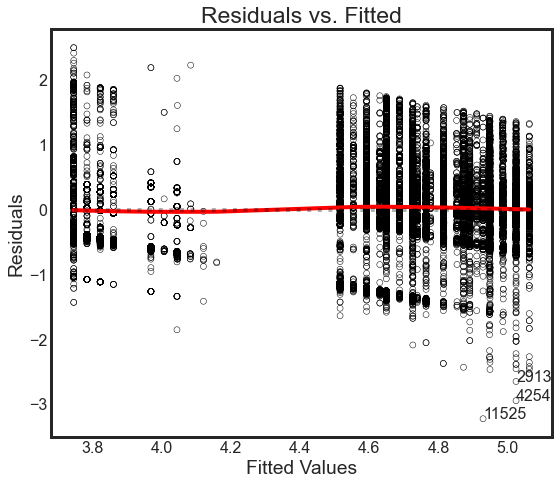

In [102]:
# Check the residuals for linearity and homoscedasticity

residuals = df_nyti_rgr_res.resid
fitted = df_nyti_rgr_res.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

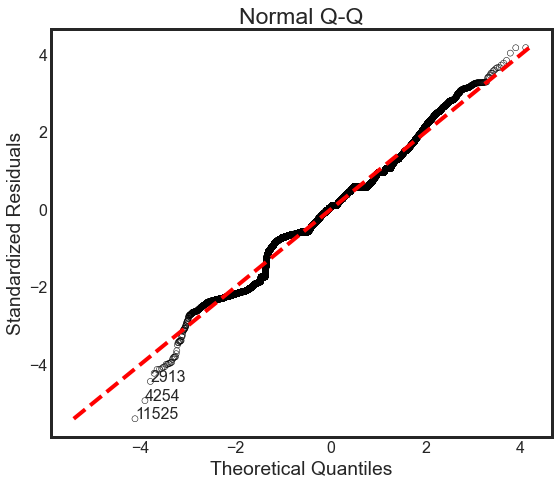

In [103]:
# qq-plot to check form normality of the residuals
sorted_residuals = pd.Series(df_nyti_rgr_res.get_influence().resid_studentized_internal)
sorted_residuals.index = df_nyti_rgr_res.resid.index
sorted_residuals = sorted_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_residuals)
df.columns = ['sorted_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_residuals'].loc[val]))
plt.show()

### Decision Tree

In [104]:
tree_features = ['Autumn', 'Winter', 'Summer', 'Weekend', 'Night', 'Route_I_Main', 'Route_I_Aux']

In [105]:
dtreergr = DecisionTreeRegressor().fit(X=df_nyti_lr[tree_features], y=df_nyti.Duration_mins)
print(tree.export_text(dtreergr))

|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- value: [49.57]
|   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |--- value: [49.60]
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- value: [55.22]
|   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |--- value: [45.32]
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- value: [56.34]
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- value: [49.46]
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 0.50
| 

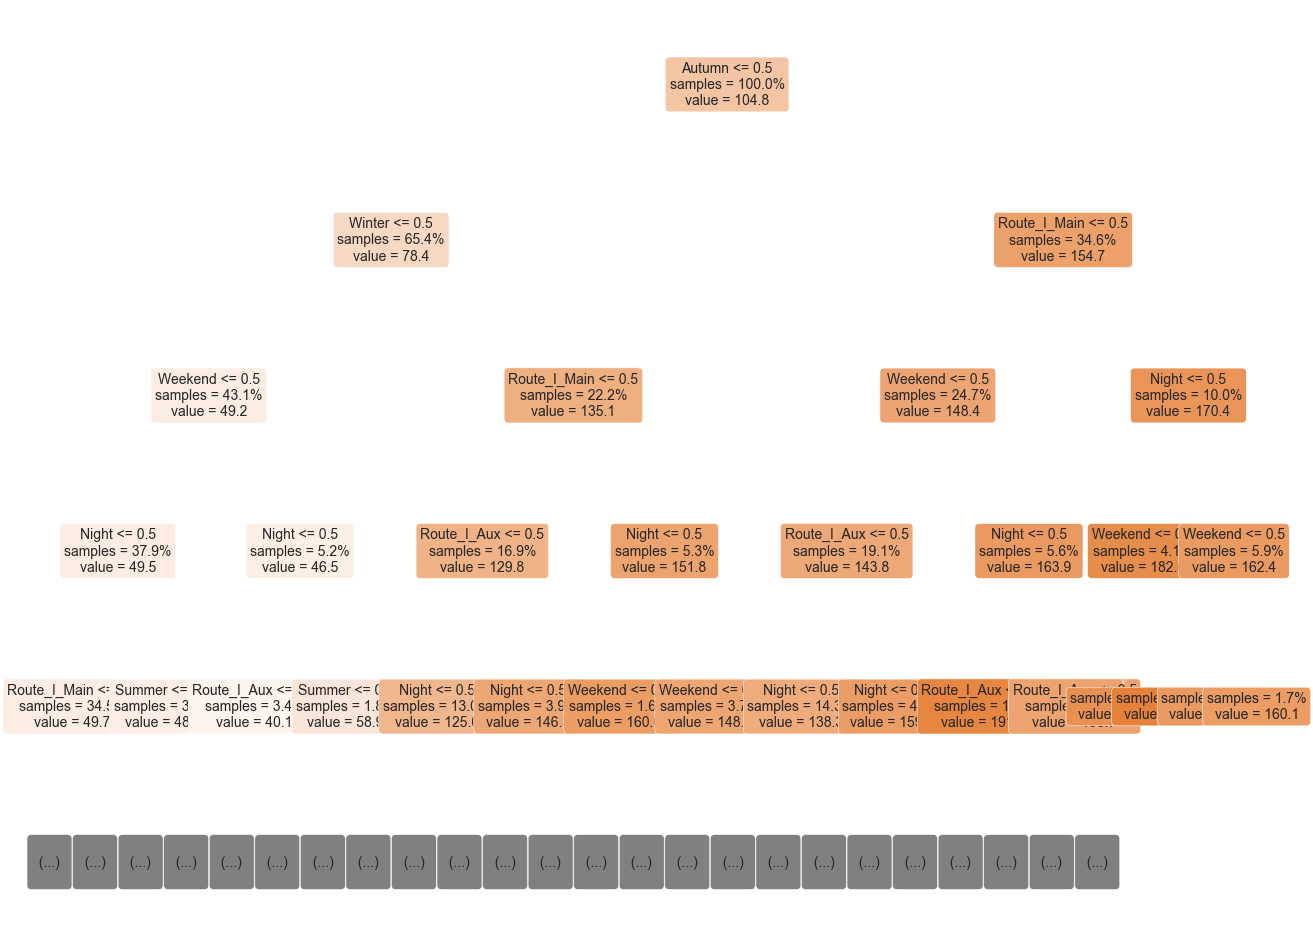

In [106]:
plt.figure(figsize=(20, 16))
plot_tree(dtreergr, max_depth=4, filled=True, feature_names=tree_features, label='all', fontsize=14, impurity=False, proportion=True, precision=1, rounded=True)
plt.show()

In [107]:
# find the optimal # leaf nodes to prune tree
parameters = {'max_leaf_nodes': range(3, 20)}
dtreergr = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
dtreergr.fit(X=df_nyti_lr[tree_features], y=df_nyti_lr.Duration_mins)
tree_model = dtreergr.best_estimator_
print("Best score was {:.4f} at {}".format(dtreergr.best_score_, dtreergr.best_params_))

Best score was -0.1071 at {'max_leaf_nodes': 3}


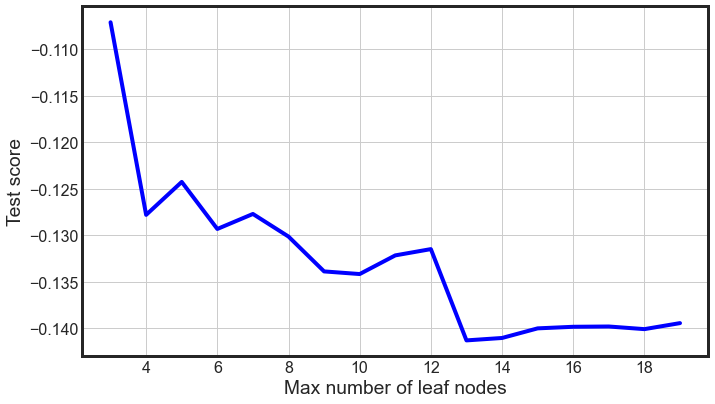

In [108]:
# plot the # leaf nodes vs test score
plt.figure(figsize=(10, 6))
plt.plot(range(3, 20), dtreergr.cv_results_['mean_test_score'], color='b') # Estimate and plot density
plt.xlabel('Max number of leaf nodes') # Set the label for the x axis
plt.ylabel('Test score') # Set the label for the y axis
plt.grid() # Add grid
plt.show()

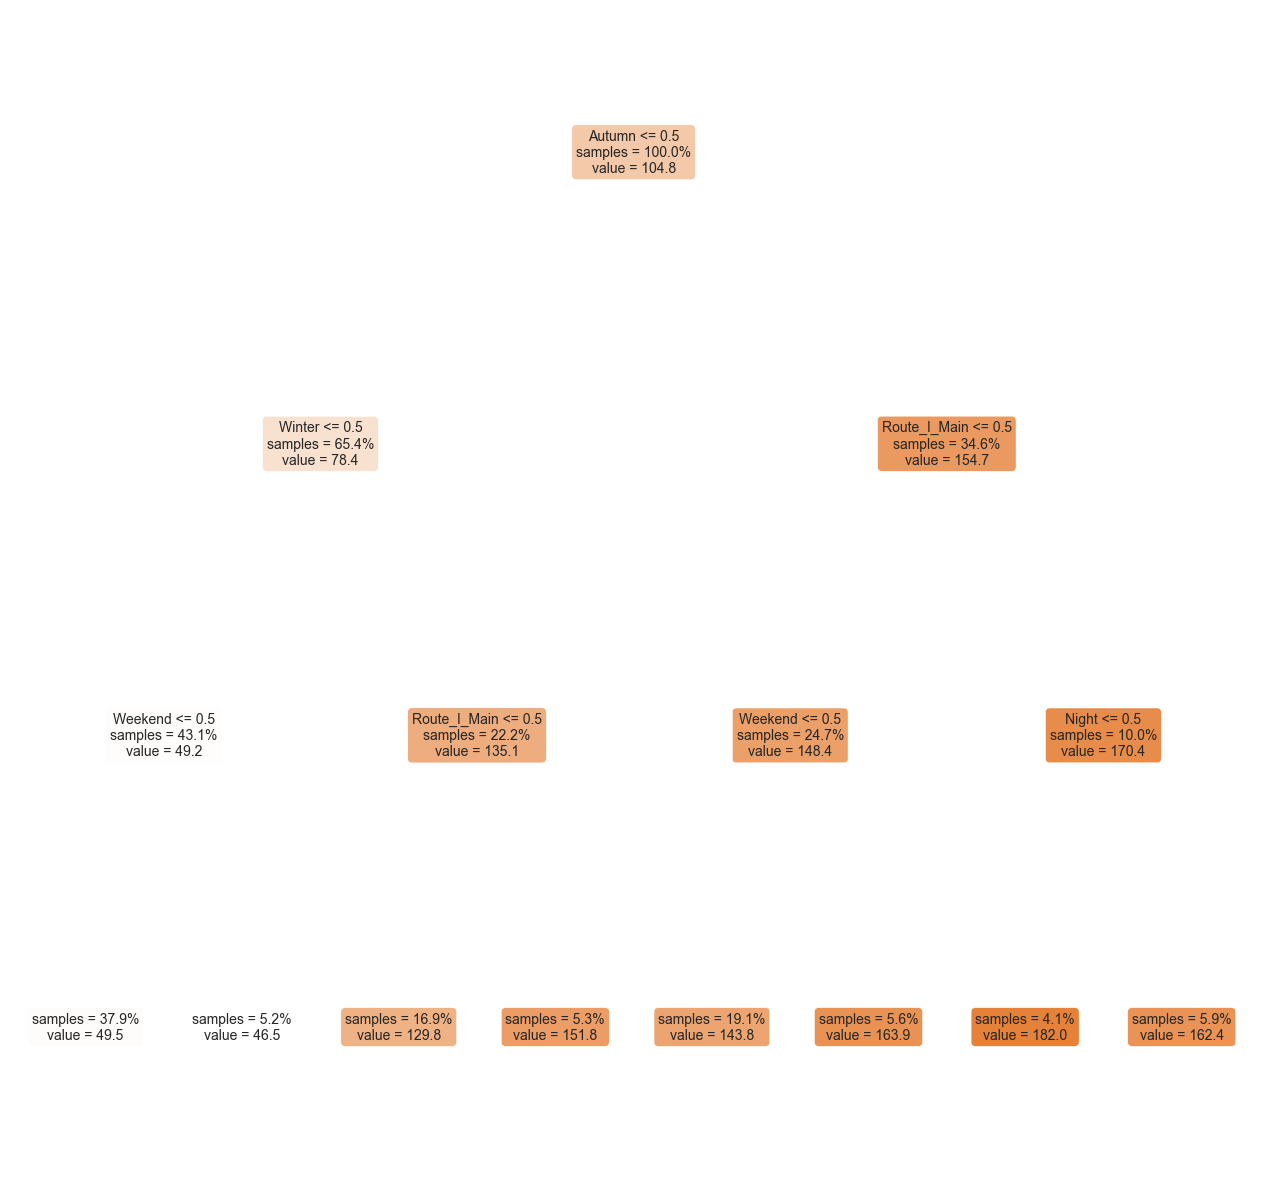

In [109]:
# prune the tree
plt.figure(figsize=(20, 20))
tr1 = tree.DecisionTreeRegressor(max_depth=3)
tr1.fit(X=df_nyti_lr[tree_features], y=df_nyti.Duration_mins)
tree.plot_tree(tr1, feature_names=tree_features, filled=True, label='all', fontsize=14, impurity=False, proportion=True, precision=1, rounded=True)
plt.show()

Results of the decision tree are summarized below:

- root                           - 104.8
  - Summer\Spring\Winter         - 78.4
    - Summer\Spring              - 49.2
      - Weekend                  - 46.5
      - Weekday                  - 49.5
    - Winter                     - 135.1
      - Not a Main Interstate    - 129.8
      - Main Interstate          - 151.8
  - Autumn                       - 154.7
    - Not a Main Interstate      - 148.4
      - Weekend                  - 143.8
      - Weekday                  - 163.9
    - Main Interstate            - 170.4
      - Night                    - 162.4
      - Day                      - 182.0

While not exactly the same, we can see quite a similiar pattern to the impact on incident duration for certain predictors as we saw in the linear regression. This provides some extra confidence that while the assumptions for linear regression may have been a little problematic, it still seems to do a reasonable job of estimating the impact of the predictors on incident duration. So we can get a fairly good feel for what is having the bigger affect on the duration of traffic incidents.